# Lecture 11
Supervised Machine Learning

### Types of Supervised Learning
* Classification - the predictor variable is categorical. Can be binary or multi-categorical.
* Regression - predictor variable is continuous. Think height of human beings.

### Basic Template.
1. Exploratory Data Analysis (determine classification/regression) See if your data is balanced, Visualize the dataset to see if you can get any help from a visualization.
2. Look to see if you can determine any unique correlations within your visualization.
3. Determine the algorithm you wish to use (K-Nearest Neighbors, Linear Regression, Decision Tree, etc..). Make sure you justify why you wish to use it.
4. Train-Test-Split your data (X_train, X_test, y_train, y_test).
5. Fit your data on the training sets (X_train, y_train).
6. Predict on your test set (X_test) and get some error metric by comparing your prediction on X_test to y_test (accuracy is easiest, but not always best).
7. Tune your algorithm using the hyperparameters that are unique to that algorithm. Determine if you need any regularization (because you're overfitting), or need a more complex (because you're underfitting).

### Example using Iris Data set

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import tree

# Load Data
iris = datasets.load_iris()
print(iris.target_names)

# Make a dataframe for easier use later
X = iris.data
y = iris.target

# Make X a DataFrame
df_x = pd.DataFrame(X, columns=iris.feature_names)

# Make y a DataFrame
df_y = pd.DataFrame(y, columns=['Type_Flower'])

# Concatenate them together
df = pd.concat([df_x, df_y], axis = 1)
df.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type_Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visual of Data

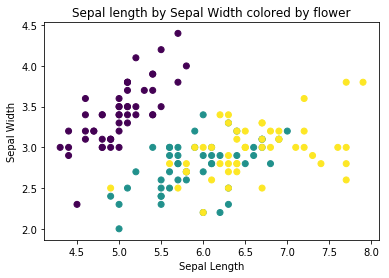

In [3]:
# Plotting using a scatter plot, first column by second column, 
# c = y tells python to color the nodes based on their classification.

# Quickest graph to Visualize
#plt.style.use('ggplot') # ggplot from R

plot = plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df['Type_Flower'])
plt.title('Sepal length by Sepal Width colored by flower')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
plt.close()

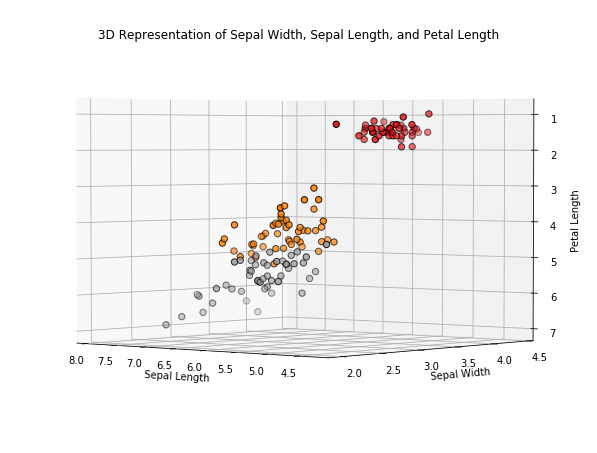

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Fancy 3D Plot
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-178, azim=50)

ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df.iloc[:,-1], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("3D Representation of Sepal Width, Sepal Length, and Petal Length")
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()
plt.close()
fig.clf()

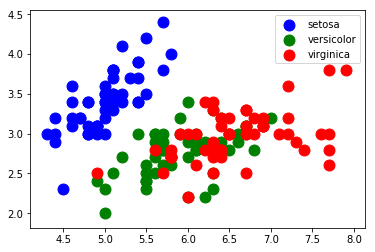

In [5]:
# If you want to visualize with a legend
df['subset'] = np.select([df.Type_Flower == 0, df.Type_Flower == 1, df.Type_Flower == 2],
                         ['setosa', 'versicolor', 'virginica'])

for color, label in zip('bgr', ['setosa', 'versicolor', 'virginica']):
    subset = df[df.subset == label]
    plt.scatter(subset.iloc[:,0], subset.iloc[:,1], s=120, c=color, label=str(label))
plt.legend()
plt.show()
plt.close()

### Thoughts
We can see that it looks like the data could be linearly separable after checking out a few plots. It will be harder to distinguish from the orange and grey above.

### Train-Test-Split

In [6]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
assert len(X_train) + len(X_test) == len(X)

### K-Nearest-Neighbors implementation

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize call to ML Algorithm of choice
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the data
knn = knn.fit(X_train, y_train)

# Predict on the data
y_prediction = knn.predict(X_test)

# Classification Report of predictions
print(classification_report(y_test, y_prediction))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      1.00      1.00        15
  virginica       1.00      1.00      1.00        17

avg / total       1.00      1.00      1.00        45



### Thoughts
You just got 100% across the board. You're the greatest ML researcher there has ever been.

### Decision Tree

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      1.00      1.00        20
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



### Thoughts
Another 100%, what is going on? Well the dataset is extremely easy to train and predict on. The features are very easily separable and doesn't require advanced non-linear decision boundaries from a more advanced model. This should be the optimal insight that sometimes you clearly don't need a fancy ML algorithm if you find your data is this easy to work with. These two algorithms are much lighter (faster) than a complex neural network/XGBoost/or Random Forest.

### What else can be done?
* You can tune hyperparameters. In the KNN case we could tune the number of neighbors we choose. This would need to be done in any case where the data set is more complex in nature.